# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
import numpy as np

def compute_svd(X):
    """
    Compute the Singular Value Decomposition of matrix X.

    Parameters:
    X (numpy.ndarray): The input data matrix of shape (m, n)

    Returns:
    U (numpy.ndarray): Left singular vectors
    S (numpy.ndarray): Singular values
    Vt (numpy.ndarray): Right singular vectors (transposed)
    """
    # Compute X^T X
    XTX = np.dot(X.T, X)

    # Compute eigenvalues and eigenvectors of X^T X
    eigenvalues, V = np.linalg.eigh(XTX)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    V = V[:, sorted_indices]

    # Compute singular values
    singular_values = np.sqrt(eigenvalues)

    # Compute U using the relation U = X V S^{-1}
    U = np.dot(X, V) / singular_values

    # Handle possible numerical issues
    U = np.nan_to_num(U)

    # Transpose V for consistency with NumPy's SVD
    Vt = V.T

    return U, singular_values, Vt

# Example usage:
# Assuming X_train is your training data matrix
# U, S, Vt = compute_svd(X_train)


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Function to train and evaluate logistic regression
def train_evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    # Initialize the Logistic Regression model
    clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return clf, accuracy

# Train on Original Data
original_clf, original_accuracy = train_evaluate_logistic_regression(
    X_train, X_test, y_train, y_test
)
print(f"Accuracy on Original Data: {original_accuracy:.4f}")

# Apply SVD with k components (e.g., k=50)
k = 50
U_train, S_train, Vt_train = compute_svd(X_train)
X_train_svd = np.dot(U_train[:, :k], np.diag(S_train[:k]))
X_test_svd = np.dot(X_test, Vt_train[:k, :].T)

# Train on SVD-Reduced Data
svd_clf, svd_accuracy = train_evaluate_logistic_regression(
    X_train_svd, X_test_svd, y_train, y_test
)
print(f"Accuracy on SVD-Reduced Data (k={k}): {svd_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on Original Data: 0.9204


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on SVD-Reduced Data (k=50): 0.9089


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
import time

# Define different values of k to experiment with
k_values = [10, 20, 50, 100, 200]

# Lists to store results
accuracies = []
training_times = []

for k in k_values:
    print(f"\nTraining with k={k} components:")

    # Start time
    start_time = time.time()

    # Compute SVD and project data
    U_train, S_train, Vt_train = compute_svd(X_train)
    X_train_svd = np.dot(U_train[:, :k], np.diag(S_train[:k]))
    X_test_svd = np.dot(X_test, Vt_train[:k, :].T)

    # Train logistic regression on reduced data
    _, accuracy = train_evaluate_logistic_regression(
        X_train_svd, X_test_svd, y_train, y_test
    )

    # End time
    end_time = time.time()

    # Record results
    accuracies.append(accuracy)
    training_times.append(end_time - start_time)

    print(f"Accuracy: {accuracy:.4f}, Training Time: {end_time - start_time:.2f} seconds")

# Also include the original data results
accuracies.insert(0, original_accuracy)
training_times.insert(0, None)  # No training time recorded for original data

print("\nExperiment Results:")
for idx, k in enumerate(['Original'] + k_values):
    acc = accuracies[idx]
    if k == 'Original':
        print(f"{k}: Accuracy = {acc:.4f}")
    else:
        time_taken = training_times[idx]
        print(f"k={k}: Accuracy = {acc:.4f}, Training Time = {time_taken:.2f} seconds")



Training with k=10 components:


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8019, Training Time: 8.94 seconds

Training with k=20 components:


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8781, Training Time: 9.63 seconds

Training with k=50 components:


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9089, Training Time: 12.33 seconds

Training with k=100 components:


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9178, Training Time: 17.55 seconds

Training with k=200 components:


<ipython-input-2-c46d2fb1b9c3>:27: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)
<ipython-input-2-c46d2fb1b9c3>:30: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X, V) / singular_values
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9206, Training Time: 38.90 seconds

Experiment Results:
Original: Accuracy = 0.9204
k=10: Accuracy = 0.8019, Training Time = 8.94 seconds
k=20: Accuracy = 0.8781, Training Time = 9.63 seconds
k=50: Accuracy = 0.9089, Training Time = 12.33 seconds
k=100: Accuracy = 0.9178, Training Time = 17.55 seconds
k=200: Accuracy = 0.9206, Training Time = 38.90 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


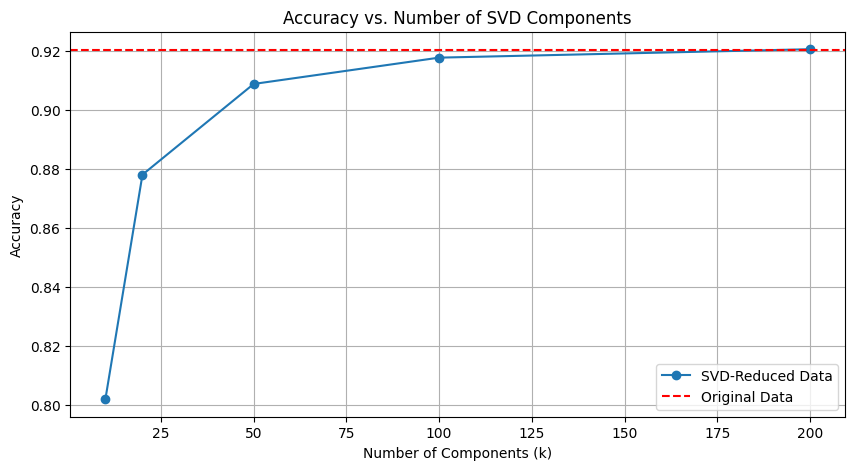

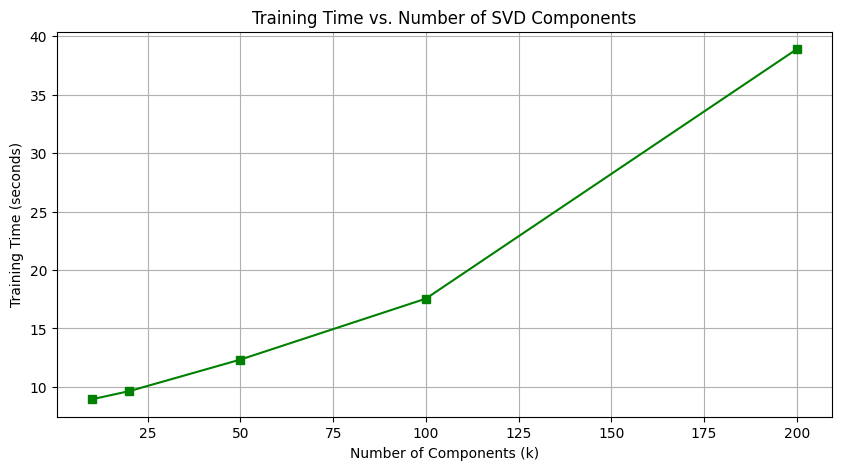

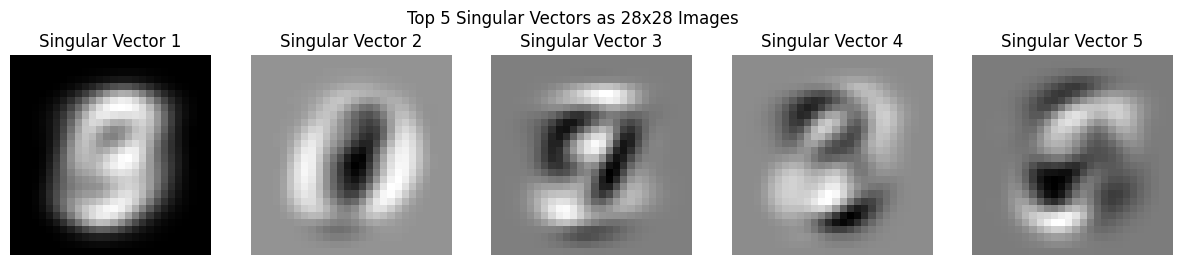

In [5]:
import matplotlib.pyplot as plt

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies[1:], marker='o', label='SVD-Reduced Data')
plt.axhline(y=original_accuracy, color='r', linestyle='--', label='Original Data')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of Components (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training Time vs. Number of SVD Components
plt.figure(figsize=(10, 5))
plt.plot(k_values, training_times[1:], marker='s', color='g')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of Components (k)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()

# Visualize Top 5 Singular Vectors as Images
# Assuming Vt_train contains the right singular vectors from the last SVD computation
top_singular_vectors = Vt_train[:5, :]  # Top 5 vectors

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    singular_vector = top_singular_vectors[i].reshape(28, 28)
    ax.imshow(singular_vector, cmap='gray')
    ax.set_title(f'Singular Vector {i+1}')
    ax.axis('off')
plt.suptitle('Top 5 Singular Vectors as 28x28 Images')
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

Optimal Number of SVD Components: Based on the results, an optimal number of components would likely fall between 50 and 100. This range preserves enough of the data's variance to maintain high accuracy while significantly reducing training time.
Advantages of Dimensionality Reduction: SVD provides an efficient way to reduce the dimensionality of large datasets like MNIST, which is beneficial for computational efficiency. This is particularly important for real-world applications where training time and resource limitations are crucial factors.
Singular Vectors as Data Representations: The top singular vectors reveal the key patterns in the data, demonstrating that SVD can also serve as a useful tool for data interpretation and visualization.